<a href="https://colab.research.google.com/github/vengie/AML-3104--Neural-Networks-and-Deep-Learning/blob/main/Anomaly_Detection_in_Cellular_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vengie Dinampo 
Assigment#1

Anomaly Detection in Cellular network


Link to Kaggle Site: https://www.kaggle.com/c/anomaly-detection-in-cellular-networks/overview The design of a cellular network focuses on the optimization of energy and resources that guarantees a smooth operation even during peak hours (i.e. periods with higher traffic load). However, this implies that cells are most of the time overprovisioned of radio resources. The goal of this study is to explore the possibilities of ML to detect abnormal behaviors in the utilization of the network that would motivate a change in the configuration of the base station.
The objective of the network optimization team is to analyze traces of past activity, which will be used to train an ML system capable of classifying samples of current activity as: • 0 (normal): current activity corresponds to normal behavior of any working day and. Therefore, no re-configuration or redistribution of resources is needed. • 1 (unusual): current activity slightly differs from the behavior usually observed for that time of the day (e.g. due to a strike, demonstration, sports event, etc.), which should trigger a reconfiguration of the base station. Notes about the dataset: The dataset has been obtained from a real LTE deployment. During two weeks, different metrics were gathered from a set of 10 base stations, each having a different number of cells, every 15 minutes. The dataset is provided in the form of a csv file, where each row corresponds to a sample obtained from one particular cell at a certain time. Each data example contains the following features:
• Time : hour of the day (in the format hh:mm) when the sample was generated.
• CellName1: text string used to uniquely identify the cell that generated the current sample. CellName is in the form xαLTE, where x identifies the base station, and α the cell within that base station (see the example in the right figure).
• PRBUsageUL and PRBUsageDL: level of resource utilization in that cell measured as the portion of Physical Radio Blocks (PRB) that were in use (%) in the previous 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
• meanThrDL and meanThrUL: average carried traffic (in Mbps) during the past 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
• maxThrDL and maxThrUL: maximum carried traffic (in Mbps) measured in the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
• meanUEDL and meanUEUL: average number of user equipment (UE) devices that were simultaneously active during the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
• maxUEDL and maxUEUL: maximum number of user equipment (UE) devices that were simultaneously active during the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
• maxUE_UL+DL: maximum number of user equipment (UE) devices that were active simultaneously in the last 15 minutes, regardless of UL and DL.
• Unusual: labels for supervised learning. A value of 0 determines that the sample corresponds to normal operation, a value of 1 identifies unusual behavior

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
%pwd

'/content'

In [3]:
%ls

sample_data/


In [4]:
cellular_data_train = '/content/sample_data/ML-MATT-CompetitionQT1920_train.csv'
cellular_data_test = '/content/sample_data/ML-MATT-CompetitionQT1920_test.csv'
df_train = pd.read_csv (cellular_data_train,encoding='latin-1')
#pd.set_option('display.max_columns', None)
df_train.head()

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,10:45,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7,1
1,9:45,1BLTE,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,10,1
2,7:45,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2,1
3,2:45,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4,1
4,3:30,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3,0


In [5]:
cellular_data_test = '/content/sample_data/ML-MATT-CompetitionQT1920_test.csv'
df_test = pd.read_csv (cellular_data_test,encoding='latin-1')
df_test.head()

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL
0,3:00,6ALTE,3.781,1.493,0.575,0.042,22.659,0.743,0.985,0.010,3.0,2.0,5.0
1,20:30,6ULTE,2.021,3.335,0.569,0.075,29.265,1.049,1.314,0.010,6.0,3.0,9.0
2,11:30,2ALTE,0.505,0.404,0.014,0.010,0.227,0.097,1.011,0.010,2.0,1.0,3.0
3,6:45,3CLTE,1.011,0.505,0.238,0.021,20.962,0.609,1.011,1.011,2.0,1.0,3.0
4,15:45,6CLTE,3.881,0.498,0.076,0.041,3.936,1.768,1.025,0.010,3.0,2.0,5.0


In [6]:
df_train.shape

(36904, 14)

In [7]:
df_train.columns

Index(['Time', 'CellName', 'PRBUsageUL', 'PRBUsageDL', 'meanThr_DL',
       'meanThr_UL', 'maxThr_DL', 'maxThr_UL', 'meanUE_DL', 'meanUE_UL',
       'maxUE_DL', 'maxUE_UL', 'maxUE_UL+DL', 'Unusual'],
      dtype='object')

In [8]:
print(f"Dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns")
print(f"Duplicates: {df_train.duplicated().sum()}")
print(f"Total Missing Values: {df_train.isna().sum().sum()}")
print(f"Number of rows with missing values: {df_train.isna().any(axis=1).sum()}")

Dataset has 36904 rows and 14 columns
Duplicates: 106
Total Missing Values: 183
Number of rows with missing values: 89


In [9]:
df_train.isnull().sum()

Time            0
CellName        0
PRBUsageUL      0
PRBUsageDL      0
meanThr_DL      0
meanThr_UL      0
maxThr_DL       0
maxThr_UL       0
meanUE_DL       0
meanUE_UL       0
maxUE_DL       89
maxUE_UL       89
maxUE_UL+DL     5
Unusual         0
dtype: int64

In [10]:
df_train[df_train.isna().any(axis=1)]

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
51,16:15,6ALTE,13.743,4.042,2.113,0.100,44.483,1.110,0.0,0.0,NaN,NaN,#¡VALOR!,0
1290,14:30,3BLTE,22.837,2.324,0.500,0.090,24.374,0.847,0.0,0.0,NaN,NaN,#¡VALOR!,0
2082,6:15,7ULTE,0.199,1.791,0.693,0.032,15.634,0.353,0.0,0.0,NaN,NaN,#¡VALOR!,1
2842,16:15,5ALTE,9.903,1.516,0.466,0.032,24.576,0.931,0.0,0.0,NaN,NaN,#¡VALOR!,0
3384,16:15,7CLTE,0.404,0.909,0.216,0.042,9.730,2.714,0.0,0.0,NaN,NaN,#¡VALOR!,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36036,6:00,9BLTE,1.516,0.505,0.078,0.013,1.298,0.267,0.0,0.0,NaN,NaN,#¡VALOR!,0
36046,13:00,3CLTE,15.360,2.829,1.149,0.071,39.615,0.947,0.0,0.0,NaN,NaN,#¡VALOR!,0
36317,13:00,1ALTE,30.921,4.042,1.450,0.175,26.369,1.487,0.0,0.0,NaN,NaN,#¡VALOR!,0
36652,8:00,7VLTE,0.606,1.819,0.255,0.027,14.546,0.820,0.0,0.0,NaN,NaN,#¡VALOR!,0


In [11]:
df_train_clean = df_train.fillna(method='ffill')
df_train_clean

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,10:45,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7,1
1,9:45,1BLTE,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,10,1
2,7:45,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2,1
3,2:45,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4,1
4,3:30,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36899,21:30,6ALTE,7.579,0.808,0.164,0.037,7.980,0.375,1.101,0.010,4.0,3.0,7,0
36900,9:45,8CLTE,9.095,1.213,0.189,0.030,19.510,1.583,1.122,1.031,4.0,2.0,6,0
36901,13:30,9BLTE,4.378,0.896,0.341,0.030,12.037,0.540,1.065,1.005,4.0,3.0,7,1
36902,12:30,3CLTE,13.339,2.728,0.559,0.065,28.187,0.894,1.223,1.061,5.0,4.0,9,0


In [12]:
df_train_clean.isnull().sum()

Time           0
CellName       0
PRBUsageUL     0
PRBUsageDL     0
meanThr_DL     0
meanThr_UL     0
maxThr_DL      0
maxThr_UL      0
meanUE_DL      0
meanUE_UL      0
maxUE_DL       0
maxUE_UL       0
maxUE_UL+DL    0
Unusual        0
dtype: int64

In [13]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36904 entries, 0 to 36903
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         36904 non-null  object 
 1   CellName     36904 non-null  object 
 2   PRBUsageUL   36904 non-null  float64
 3   PRBUsageDL   36904 non-null  float64
 4   meanThr_DL   36904 non-null  float64
 5   meanThr_UL   36904 non-null  float64
 6   maxThr_DL    36904 non-null  float64
 7   maxThr_UL    36904 non-null  float64
 8   meanUE_DL    36904 non-null  float64
 9   meanUE_UL    36904 non-null  float64
 10  maxUE_DL     36904 non-null  float64
 11  maxUE_UL     36904 non-null  float64
 12  maxUE_UL+DL  36904 non-null  object 
 13  Unusual      36904 non-null  int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 3.9+ MB


In [14]:
df_train_clean.to_csv('/content/sample_data/clean_train.csv', index=False, header=True, encoding="utf-8")
#df_test_clean.to_csv('/content/sample_data/clean_test.csv',index=False, header=True, encoding="utf-8")

**Data Visualization**

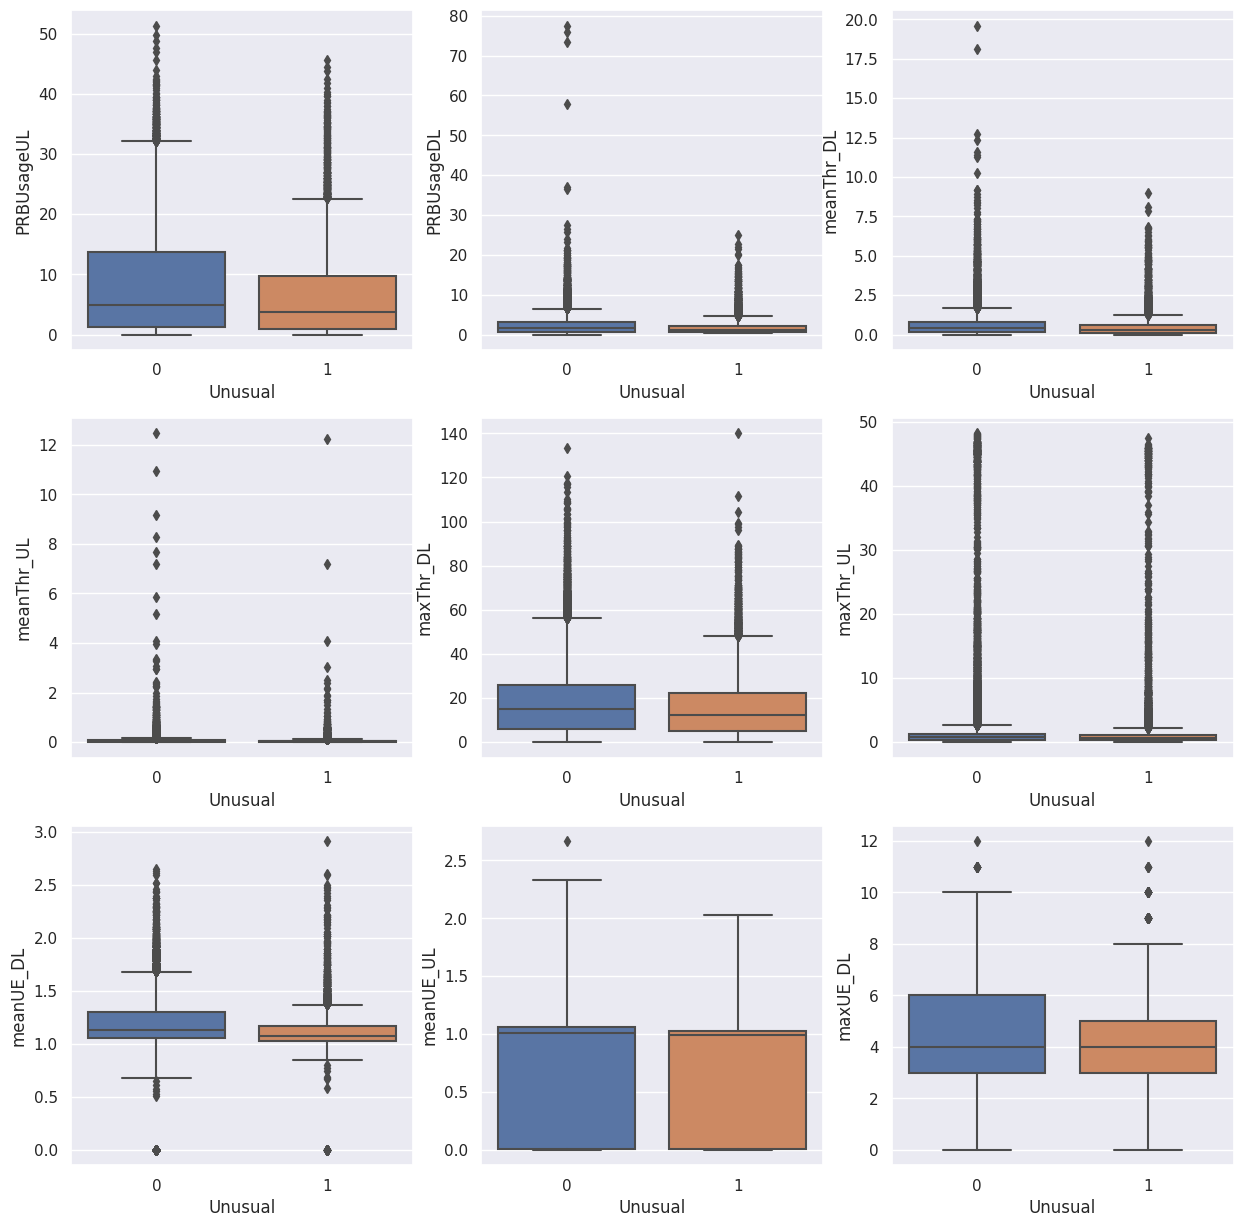

In [15]:
import matplotlib.pyplot as plt

sns.set_theme()

figure, axis = plt.subplots(3, 3, figsize=(15, 15))

sns.boxplot(y='PRBUsageUL', x='Unusual', data=df_train_clean, ax=axis[0, 0])
sns.boxplot(y='PRBUsageDL', x='Unusual', data=df_train_clean, ax=axis[0, 1])
sns.boxplot(y='meanThr_DL', x='Unusual', data=df_train_clean, ax=axis[0, 2])
sns.boxplot(y='meanThr_UL', x='Unusual', data=df_train_clean, ax=axis[1, 0])
sns.boxplot(y='maxThr_DL', x='Unusual', data=df_train_clean, ax=axis[1, 1])
sns.boxplot(y='maxThr_UL', x='Unusual', data=df_train_clean, ax=axis[1, 2])
sns.boxplot(y='meanUE_DL', x='Unusual', data=df_train_clean, ax=axis[2, 0])
sns.boxplot(y='meanUE_UL', x='Unusual', data=df_train_clean, ax=axis[2, 1])
sns.boxplot(y='maxUE_DL', x='Unusual', data=df_train_clean, ax=axis[2, 2])

plt.show()


**Convert categorical variable into integers**

In [16]:
from sklearn.preprocessing import LabelEncoder

selected_data = df_train_clean['maxUE_UL+DL']

le = LabelEncoder()
le.fit(selected_data)
transformed_data = le.transform(selected_data)

In [17]:
# removing the column 'maxUE_UL+DL' from df
# as it is of no use now.
df_train_clean.drop('maxUE_UL+DL', axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'Job'
df_train_clean['maxUE_UL+DL'] = transformed_data
 
# printing Dataframe
df_train_clean

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,Unusual,maxUE_UL+DL
0,10:45,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,1,21
1,9:45,1BLTE,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,1,3
2,7:45,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,1,13
3,2:45,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,1,18
4,3:30,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36899,21:30,6ALTE,7.579,0.808,0.164,0.037,7.980,0.375,1.101,0.010,4.0,3.0,0,21
36900,9:45,8CLTE,9.095,1.213,0.189,0.030,19.510,1.583,1.122,1.031,4.0,2.0,0,20
36901,13:30,9BLTE,4.378,0.896,0.341,0.030,12.037,0.540,1.065,1.005,4.0,3.0,1,21
36902,12:30,3CLTE,13.339,2.728,0.559,0.065,28.187,0.894,1.223,1.061,5.0,4.0,0,23


**Checking Correlation between Variables**

<ipython-input-18-3960ea42c686>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


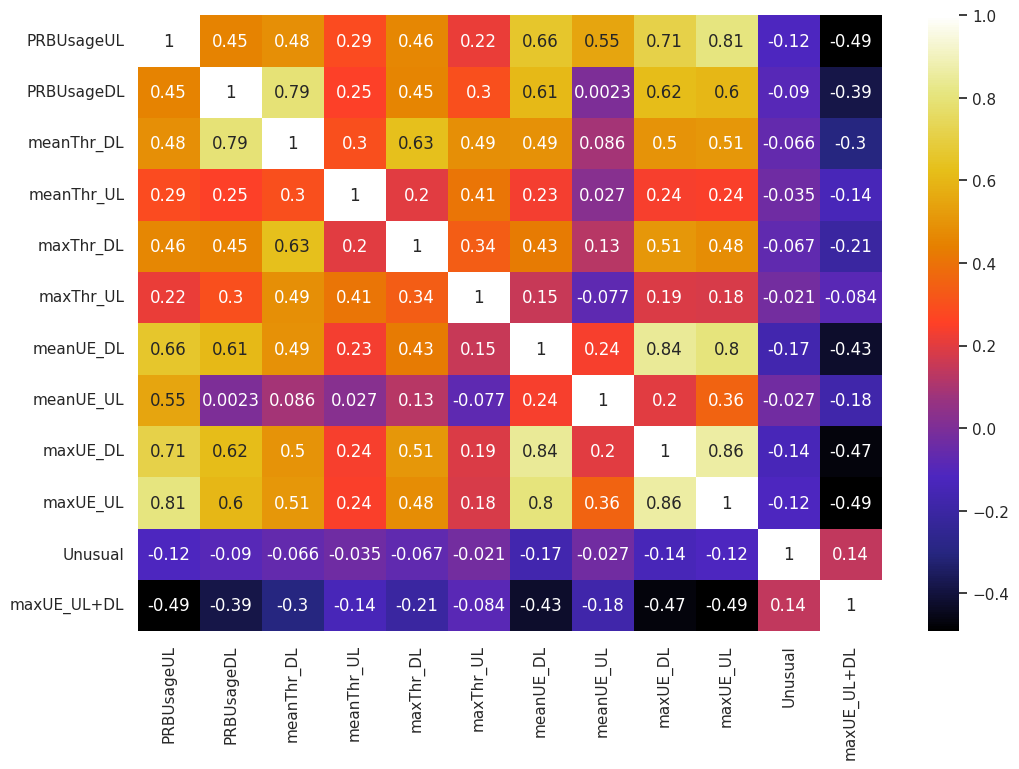

In [18]:
def plot_corr(df):
    corr = df.corr()
    sns.set_theme()
    plt.figure(figsize = (12, 8))
    sns.heatmap(corr, cbar=True, annot=True, cmap='CMRmap')
    
plot_corr(df_train_clean)

**Train Test Split**

In [19]:
X = df_train_clean.drop(['Time','CellName','Unusual'], axis=1)
y = df_train_clean['Unusual']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Model Building**

In [22]:
from sklearn.linear_model import LogisticRegression


model_logistic = LogisticRegression(solver='sag', max_iter=1000, tol=1e-4)
model_logistic.fit(X_train, y_train)
model_logistic


LogisticRegression(max_iter=1000, solver='sag')

In [23]:
from sklearn.metrics import classification_report

y_pred = model_logistic.predict(X_test)

# Get the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.72      0.99      0.84      5335
           1       0.20      0.01      0.01      2046

    accuracy                           0.72      7381
   macro avg       0.46      0.50      0.42      7381
weighted avg       0.58      0.72      0.61      7381



**Feature Selection**

In [24]:
from sklearn.feature_selection import SelectKBest, chi2

# Create an instance of the feature selector (replace with your preferred method)
selector = SelectKBest(score_func=chi2, k=2)

# Fit the selector to the data
selector.fit(X, y)

SelectKBest(k=2, score_func=<function chi2 at 0x7f577d459f30>)

In [25]:
# Get the scores and p-values for each feature
scores = selector.scores_
p_values = selector.pvalues_

In [26]:
# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

In [27]:

# Print the selected features
selected_features = [df_train_clean.columns[i] for i in selected_features_indices]
print("Selected features:", selected_features)

Selected features: ['Time', 'meanThr_DL']
